# **Progetto di Digital Signal & Image Management**

## **Parte 1 - Audio recognition- DEMO**


*2020/2021*

Peracchi Marco 800578

Uccheddu Christian 800428

In [16]:
import os
import numpy as np
from time import time
from scipy.io import wavfile as wav
import IPython.display as ipd
import librosa
import re
import seaborn as sns
import sounddevice as sd

import matplotlib.pyplot as plt

import pandas as pd


import librosa.display
from sklearn.preprocessing import scale

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import mobilenet

In [39]:
duration = 7 # (seconds)
rec_rate = 44100
signal = sd.rec(int(duration * rec_rate), samplerate=rec_rate, channels=1, blocking=True)

In [40]:
signal

array([[-0.03822689],
       [-0.0389005 ],
       [-0.03094493],
       ...,
       [-0.03877579],
       [-0.03666297],
       [-0.03173088]], dtype=float32)

In [43]:
prova = signal[:,0]

In [42]:
ipd.Audio(signal[:,0], rate=rec_rate)

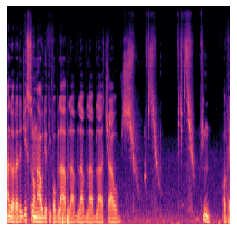

In [45]:
spect = librosa.feature.melspectrogram(y=prova, n_mels=128)
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
S_dB = librosa.power_to_db(spect, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax)
fig.savefig("single/test/"+"demo.png", dpi = 100)

In [46]:
single_processing = keras.preprocessing.image.ImageDataGenerator(preprocessing_function= mobilenet.preprocess_input)

single_generator = single_processing.flow_from_directory("single",
                                    target_size = (224, 224),
                                    color_mode = "rgb",
                                    batch_size = 1,
                                    class_mode = "categorical",
                                    shuffle = False,
                                    seed = 1)
test,label_test = next(single_generator)

Found 1 images belonging to 2 classes.


In [50]:
model_1 = tf.saved_model.load('modello_audio')

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.


TypeError: load() missing 2 required positional arguments: 'tags' and 'export_dir'

In [ ]:
test_features = model_1.predict(test)
test_features = test_features.reshape(test_features.shape[0],
                                      test_features.shape[1]*test_features.shape[2]*test_features.shape[3])

In [ ]:
pred_finali = lr_1.predict(test_features)

In [ ]:
pred_finali

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in pred_finali]

predictions